In [118]:
# Importing basic libraries
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for model preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing library for model building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import recall_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [119]:
# Importing libraries for removing warnings
import warnings as warnings
warnings.filterwarnings("ignore")

In [120]:
# Importing the file
Lead_Status = pd.read_excel(r'K:\UniAcco\Data_Science_Internship.xlsx',index_col=0)
Lead_Status.head(10)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaT,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5.0,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120.0,semester-stay,NaT,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6.0,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0.0,NaT,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...
7.0,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51.0,2022-09-08,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e

In [121]:
# Checking the Shape of Data i.e.Rows and Columns present in the Dataframe
Lead_Status.shape

(46608, 15)

In [122]:
# Checking Shape
Lead_Status.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [124]:
# Getting brief overview of dataset
Lead_Status.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 46608 entries, 0.0 to 46607.0
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Agent_id        46608 non-null  object        
 1   status          46608 non-null  object        
 2   lost_reason     43244 non-null  object        
 3   budget          42908 non-null  object        
 4   lease           44267 non-null  object        
 5   movein          32970 non-null  datetime64[ns]
 6   source          46608 non-null  object        
 7   source_city     46608 non-null  object        
 8   source_country  46608 non-null  object        
 9   utm_source      46608 non-null  object        
 10  utm_medium      46608 non-null  object        
 11  des_city        46608 non-null  object        
 12  des_country     46608 non-null  object        
 13  room_type       23061 non-null  object        
 14  lead_id         46608 non-null  object        
d

In [125]:
# Checking other values
Lead_Status.describe().T

,count,unique,top,freq,first,last
Agent_id,46608,120,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,8186,NaT,NaT
status,46608,6,LOST,43244,NaT,NaT
lost_reason,43244,30,Low availability,8892,NaT,NaT
budget,42908,1840,£60 - £120 Per week,9862,NaT,NaT
lease,44267,311,Full Year Course Stay 40 - 44 weeks,11111,NaT,NaT
movein,32970,477,2022-09-10 00:00:00,2453,1970-01-01,2024-09-04
source,46608,683,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,19306,NaT,NaT
source_city,46608,4336,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,8851,NaT,NaT
source_country,46608,186,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,18812,NaT,NaT
utm_source,46608,35,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,31125,NaT,NaT


In [126]:
#We will try to change '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' values of the columns to NAN.

#We will try to drop columns having 35% missing values.

#We will try to drop rows having 70% missing values

#We will try to merge unique categories if they are multiples.

#We will impute the missing values

#We will treat Categorical column with mode value

#We will compare orginal with cleaned data

In [127]:
# Calculating the shape after removing duplicates
Lead_Status_modified = Lead_Status.drop_duplicates(keep = 'first')
Lead_Status_modified.shape

(46598, 15)

In [128]:
# As we can see that there are no duplicate values found.

In [129]:
# Getting unique values with counts 
Lead_Status_modified['status'].value_counts()

LOST           43235
WON             3072
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [130]:
# Change the mapping of a column
Lead_Status_modified['status'] = Lead_Status_modified['status'].map({'LOST':0, 'WON':1, 'OPPORTUNITY':2, 'CONTACTED':3, 'PROCESSING':4, 'IMPORTANT':5})
Lead_Status_modified['status'].value_counts()

0    43235
1     3072
2      254
3       28
4        8
5        1
Name: status, dtype: int64

In [132]:
# Replacing the '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' with NaN
Lead_Status_modified.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.NAN, inplace=True)
Lead_Status_modified.head(3)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...


In [133]:
# Function to remove the columns having more than 40% missing values

def rmissingvaluecol(dff, threshold):
    col = []
    col = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(col)))
    print("Columns to be dropped                             : ", list(set(list((dff.columns.values))) - set(col)))
    return col


In [134]:
# Removing columns having 40% missing values
col = rmissingvaluecol(Lead_Status_modified, 40)
Lead_Status_modified = Lead_Status_modified[col]
Lead_Status_modified.head()

Columns having more than 40 percent missing values:  1
Columns to be dropped                             :  ['room_type']


,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,lead_id
0.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1.0,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2.0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,2022-08-31,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3.0,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0.0,NaT,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4.0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaT,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [135]:
# 1 column removed.

In [136]:
# Deleting rows containing either 70% or more than 70% NaN Values
perc = 70.0 
min_count =  int(((100-perc)/100)*Lead_Status_modified.shape[1] + 1)
Lead_Status_modified = Lead_Status_modified.dropna(axis=0, thresh=min_count)
Lead_Status_modified.shape

(46598, 14)

In [137]:
# Removing columns with highly skewed data
skewed_columns_to_be_dropped = ['des_country','lead_id']

Lead_Status_modified.drop(skewed_columns_to_be_dropped, axis=1, inplace=True)
Lead_Status_modified.shape

(46598, 12)

In [138]:
# calculating % of missing values
round(Lead_Status_modified.isnull().sum()* 100 / len(Lead_Status_modified), 2)

Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.93
lease              5.02
movein            29.26
source            12.82
source_city       18.97
source_country    18.52
utm_source         0.13
utm_medium         6.84
des_city           5.44
dtype: float64

In [139]:
# checking droped columns
Lead_Status_modified.columns

Index(['Agent_id', 'status', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city'],
      dtype='object')

In [140]:
# For the columns with less percentage of missing, use some imputation technique.
# Listing down categorical columns with missing values

categorical_column_names = ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 'des_city','utm_source','utm_medium']

for column_name in categorical_column_names:
    print("Column Name        :", column_name)
    print("------------------------------")

    #print("Unique Values      : ", Lead_Status_modified[column_name].unique())    
    values_to_be_imputed = Lead_Status_modified[column_name].isnull().sum()
    print("Any Null (Before)  :", values_to_be_imputed)
    
    Lead_Status_modified[column_name].fillna(Lead_Status_modified[column_name].mode()[0], inplace=True)
    print(values_to_be_imputed, " values imputed with mode values of the column.")
    
    print("Null Values (After):", Lead_Status_modified[column_name].isnull().sum())
    print('\n')

Column Name        : lost_reason
------------------------------
Any Null (Before)  : 3363
3363  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : budget
------------------------------
Any Null (Before)  : 3693
3693  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : lease
------------------------------
Any Null (Before)  : 2339
2339  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : movein
------------------------------
Any Null (Before)  : 13633
13633  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source
------------------------------
Any Null (Before)  : 5972
5972  values imputed with mode values of the column.
Null Values (After): 0


Column Name        : source_city
------------------------------
Any Null (Before)  : 8841
8841  values imputed with mode values of the column.
Null Values (After): 0


Column Name

In [141]:
# Checking the unique categories
column_names = Lead_Status_modified.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(Lead_Status_modified[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Agent_id
------------------------------------------
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.547963
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.122452
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.746899
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.371346
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.296236
                                                                      ...    
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002146
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002146
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002146
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002146
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a     0.002146
Name: Agent_id, Length: 120, dtype: float64


Column Name        : st

In [142]:
# Changing categories with lesser percentage to 'others'

def change_to_others(x, value_counts_df):
    for key, val in value_counts_df.to_dict().items():
        if key == x and val < 10:
            return 'others'
    return x

# Checking the unique categories
columns_not_to_be_considered = ['status']
column_names = Lead_Status_modified.columns
column_names = column_names.drop(columns_not_to_be_considered)
columns_to_be_changed = column_names

for column_name in columns_to_be_changed:
    print("Column Name : ", column_name)
    print("-----------------------------------------")

    value_counts_df = Lead_Status_modified[column_name].value_counts(normalize=True) * 100
    print("Before :")
    print(value_counts_df)
    print('\n')

    Lead_Status_modified[column_name] = Lead_Status_modified[column_name].apply(lambda x:change_to_others(x, value_counts_df))
    value_counts_df = Lead_Status_modified[column_name].value_counts(normalize=True) * 100
    print("After :")
    print(value_counts_df)
    print('\n')

Column Name :  Agent_id
-----------------------------------------
Before :
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e    17.547963
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489     3.122452
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450     2.746899
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5     2.371346
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b     2.296236
                                                                      ...    
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d     0.002146
fb87e6cf60af08595bd9fcf1f006a12f1338cb4480acea383b3b65da10bb9f28     0.002146
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963     0.002146
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a     0.002146
4ec9599fc203d176a301536c2e091a19bc852759b255bd6818810a42c5fed14a     0.002146
Name: Agent_id, Length: 120, dtype: float64


After :
others       

After :
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    58.893086
others                                                              26.086957
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    15.019958
Name: source_country, dtype: float64


Column Name :  utm_source
-----------------------------------------
Before :
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3    66.925619
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    10.215031
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a     4.242671
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3     3.751234
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579     3.281257
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7     2.695395
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1     2.251170
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158     1.854157
44574c4ba2ea74ad4b

In [143]:
# Droping Nan values from Dataframe
Lead_Status_modified = Lead_Status_modified.dropna()

In [144]:
# Verifying various parameters after cleaning
print("Before Cleaning Data")
print("*********************************")
print("Shape: ", Lead_Status.shape)
print("Missing:")
print("-----------------------")
print(round(Lead_Status.isnull().sum()*100/len(Lead_Status), 2))

print('\n')
print("After Cleaning Data")
print("*********************************")
print("Shape: ", Lead_Status_modified.shape)
print("Missing:")
print("-----------------------")
print(round(Lead_Status_modified.isnull().sum()*100/len(Lead_Status_modified), 2))

Before Cleaning Data
*********************************
Shape:  (46608, 15)
Missing:
-----------------------
Agent_id           0.00
status             0.00
lost_reason        7.22
budget             7.94
lease              5.02
movein            29.26
source             0.00
source_city        0.00
source_country     0.00
utm_source         0.00
utm_medium         0.00
des_city           0.00
des_country        0.00
room_type         50.52
lead_id            0.00
dtype: float64


After Cleaning Data
*********************************
Shape:  (46598, 12)
Missing:
-----------------------
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
dtype: float64


In [145]:
#We will create dummies for categorical columns.
#We will split data into train-test set.
#We will perform scaling.

In [146]:
#Create dummies for all categorical col
column_names = ['Agent_id','lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city']

for column_name in column_names:
    dummies = pd.get_dummies(Lead_Status_modified[column_name])
    dummies.drop('others', axis=1, inplace=True)
    Lead_Status_modified = pd.concat([Lead_Status_modified, dummies], axis=1)
    Lead_Status_modified.drop(column_name, axis=1, inplace=True)
    print("Dummies created for: ", column_name)

Lead_Status_modified.head()

Dummies created for:  Agent_id
Dummies created for:  lost_reason
Dummies created for:  budget
Dummies created for:  lease
Dummies created for:  movein
Dummies created for:  source
Dummies created for:  source_city
Dummies created for:  source_country
Dummies created for:  utm_source
Dummies created for:  utm_medium
Dummies created for:  des_city


,status,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0.0,...,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0.0,0,0,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1
1.0,0,0,0,1,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,0
2.0,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
3.0,0,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4.0,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,1,0,0,0,1


In [147]:
# Splitting the data into train-test set

In [148]:
# Putting feature variable to X
X = Lead_Status_modified.drop('status', axis=1)

X.head()

,2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Low availability,Low budget,Not interested,Not responding,0-0,£121 - £180 Per Week,£60 - £120 Per week,0.0,Complete Education Year Stay 50 - 52 weeks,Full Year Course Stay 40 - 44 weeks,2022-09-10 00:00:00,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7
0.0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1
1.0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0
2.0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0
3.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0
4.0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1


In [149]:
# Putting response variable to y
y = Lead_Status_modified.status
y.head()

0.0    0
1.0    0
2.0    0
3.0    0
4.0    0
Name: status, dtype: int64

In [150]:
# Splitting the data into train and test on a ratio of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [151]:
# Scaling the continuous data

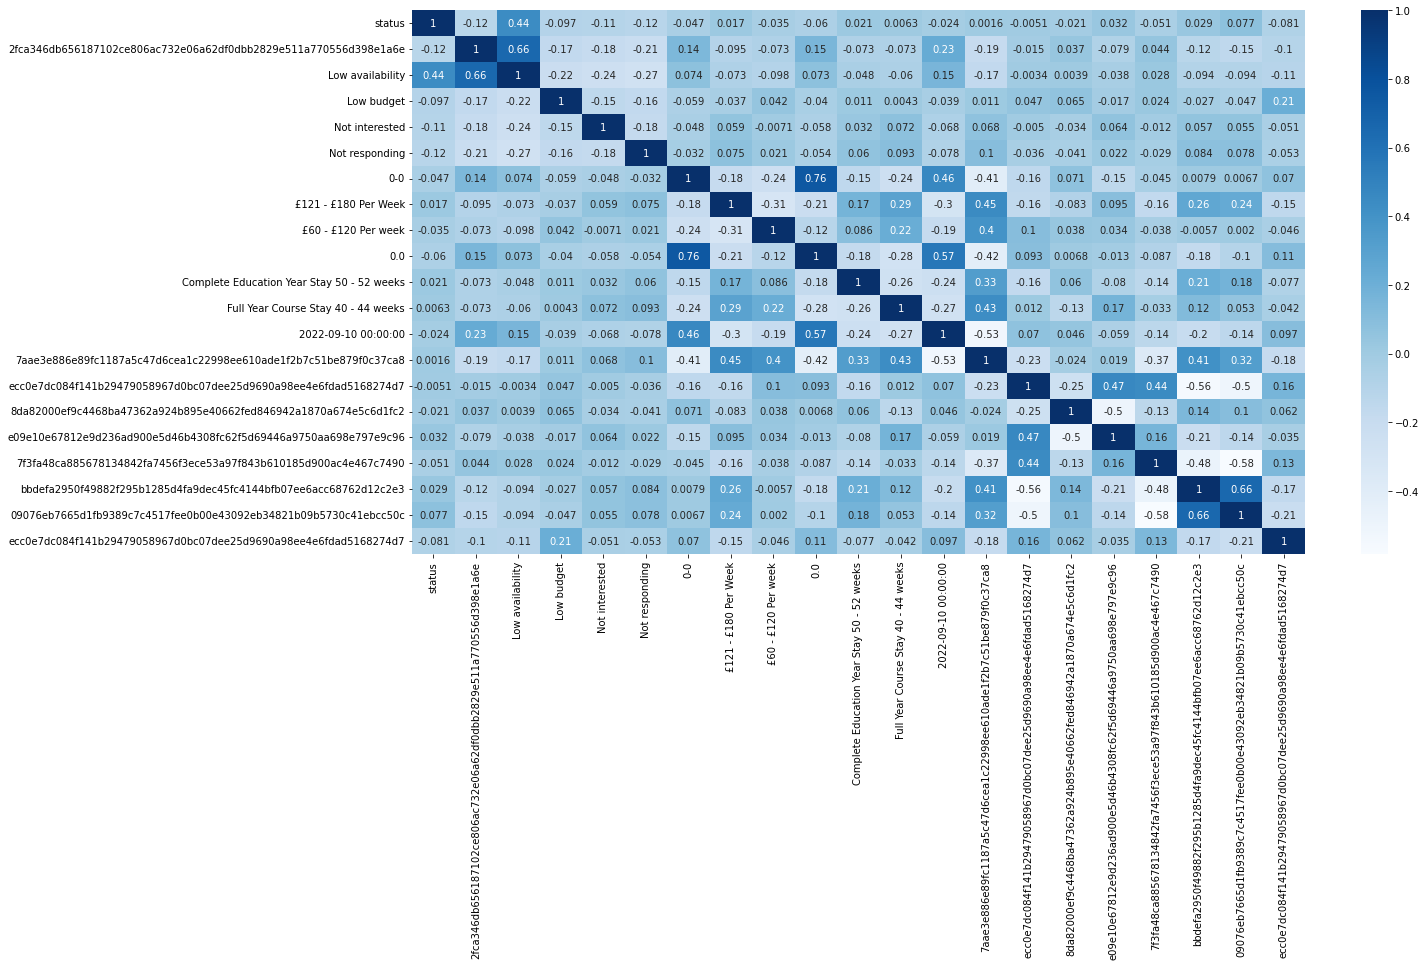

In [152]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead_Status_modified.corr(), annot = True, cmap="Blues")
plt.show()

In [153]:
#We will try to build our first.
#We will use RFE to know how much parameters can be considered.
#We will iteratively remove columns either having high p or VIF.

In [154]:
# Building our first model

In [155]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32618
Model:                            GLM   Df Residuals:                    32597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Thu, 16 Feb 2023   Deviance:                       20827.
Time:                        21:19:58   Pearson chi2:                 1.77e+04
No. Iterations:                    29                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -32.3810   2.27e+04     -0.001      0.999   -4.46e+04    4.45e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -32.6014   2.96e+04     -0.001      0.999   -5.81e+04     5.8e+04
Low availability                                                    32.9714   2.27e+04      0.001      0.999   -4.45e+04    4.46e+04
Low budget                                                           0.2577   4.29e+04      6e-06      1.000   -8.42e+04    8.42e+04
Not interested                                                      -0.4491   4.28e+04  -1.05e-05      1.000   -8.39e+04    8.39e+04
Not responding                                                      -0.4560   4.01e+04  -1.14e-05      1.000   -7.87e+04    7.86e+04
0-0                                                                 -0.5364      0.274     -1.957      0.050      -1.074       0.001
£121 - £180 Per Week                                                 0.1371      0.220      0.624      0.533      -0.294       0.568
£60 - £120 Per week                                                  0.5067      0.179      2.827      0.005       0.155       0.858
0.0                                                                 -1.0559      0.258     -4.098      0.000      -1.561      -0.551
Complete Education Year Stay 50 - 52 weeks                           1.0037      0.233      4.306      0.000       0.547       1.461
Full Year Course Stay 40 - 44 weeks                                  0.2774      0.174      1.598      0.110      -0.063       0.618
2022-09-10 00:00:00                                                 -0.0937      0.151     -0.618      0.536      -0.391       0.203
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    -0.4843      0.192     -2.525      0.012      -0.860      -0.108
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7     0.2175      0.184      1.184      0.237      -0.143       0.578
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.1488      0.178     -0.837      0.403      -0.498       0.200
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.6850      0.151      4.525      0.000       0.388       0.982
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490    -0.3422      0.241     -1.420      0.156      -0.815       0.130
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3     0.6865      0.146      4.694      0.000       0.400       0.973
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.3902      0.146      9.531      0.000       1.104       1.676
ecc0e7dc084f141b29479058

In [156]:
# Running RFE to check parameter significance

In [157]:
# Initializing LogisticRegression
logreg = LogisticRegression()

# Running RFE with 17 variables as output
rfe = RFE(logreg, step=17)             
rfe = rfe.fit(X_train, y_train)

# Listing the columns
for i in list(zip(X_train.columns, rfe.support_, rfe.ranking_)):
    print(i)

('2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e', True, 1)
('Low availability', True, 1)
('Low budget', False, 2)
('Not interested', False, 2)
('Not responding', True, 1)
('0-0', True, 1)
('£121 - £180 Per Week', False, 2)
('£60 - £120 Per week', False, 2)
(0.0, False, 2)
('Complete Education Year Stay 50 - 52 weeks', False, 2)
('Full Year Course Stay 40 - 44 weeks', False, 2)
(Timestamp('2022-09-10 00:00:00'), True, 1)
('7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8', True, 1)
('ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7', False, 2)
('8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2', True, 1)
('e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96', True, 1)
('7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490', False, 2)
('bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3', False, 2)
('09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c', True, 1)
('ecc0e7

In [158]:
# Listing down the columns important for building a model
col = X_train.columns[rfe.support_]
col

Index(['2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e',
                                                       'Low availability',
                                                         'Not responding',
                                                                    '0-0',
                                                      2022-09-10 00:00:00,
       '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8',
       '8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2',
       'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96',
       '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7'],
      dtype='object')

In [159]:
# Listing down the columns not important
z = X_train.columns[~rfe.support_]
z

Index([                                                      'Low budget',
                                                         'Not interested',
                                                   '£121 - £180 Per Week',
                                                    '£60 - £120 Per week',
                                                                      0.0,
                             'Complete Education Year Stay 50 - 52 weeks',
                                    'Full Year Course Stay 40 - 44 weeks',
       'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7',
       '7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490',
       'bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3'],
      dtype='object')

In [160]:
# Building our model

In [161]:
# Building our second model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 status   No. Observations:                32618
Model:                            GLM   Df Residuals:                    32606
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Thu, 16 Feb 2023   Deviance:                       20796.
Time:                        21:20:04   Pearson chi2:                 1.40e+04
No. Iterations:                    29                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
const                                                              -31.8803   1.73e+04     -0.002      0.999   -3.39e+04    3.38e+04
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e   -32.4394      3e+04     -0.001      0.999   -5.88e+04    5.88e+04
Low availability                                                    32.8527   1.73e+04      0.002      0.998   -3.38e+04    3.39e+04
Not responding                                                      -0.3173   3.77e+04  -8.42e-06      1.000   -7.38e+04    7.38e+04
0-0                                                                 -1.3602      0.182     -7.479      0.000      -1.717      -1.004
2022-09-10 00:00:00                                                 -0.2875      0.129     -2.222      0.026      -0.541      -0.034
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8     0.1951      0.132      1.482      0.138      -0.063       0.453
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    -0.0917      0.172     -0.533      0.594      -0.429       0.246
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96     0.6473      0.149      4.339      0.000       0.355       0.940
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c     1.5734      0.130     12.097      0.000       1.318       1.828
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -0.2354      0.158     -1.493      0.135      -0.544       0.074
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7    -3.1053      0.114    -27.207      0.000      -3.329      -2.882
====================================================================================================================================
"""

In [162]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([4.42106293e-15, 7.63467289e-14, 5.55867011e-14, 1.59854516e-13,
       1.56912325e-14, 2.15514547e-14, 2.03859423e-02, 1.59854516e-13,
       1.16387242e-13, 9.86597065e-14])

In [163]:
# Forming prediction table 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,4.421063e-15,39708.0
1,0,7.634673e-14,19082.0
2,0,5.558670e-14,27916.0
3,0,1.598545e-13,4872.0
4,0,1.569123e-14,6302.0


In [164]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,4.421063e-15,39708.0,0
1,0,7.634673e-14,19082.0,0
2,0,5.558670e-14,27916.0,0
3,0,1.598545e-13,4872.0,0
4,0,1.569123e-14,6302.0,0


In [165]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,Predicted,Lead_Score
0,0,4.421063e-15,39708.0,0,0
1,0,7.634673e-14,19082.0,0,0
2,0,5.558670e-14,27916.0,0,0
3,0,1.598545e-13,4872.0,0,0
4,0,1.569123e-14,6302.0,0,0


In [166]:
y_train_pred_final['Lead_Score'].value_counts()

0     29167
97      599
94      442
95      318
96      285
93      229
15      172
80      102
91       95
39       84
41       75
82       74
90       63
71       59
57       56
14       52
75       49
12       44
92       41
78       39
10       35
34       33
18       32
52       31
79       30
11       28
36       27
86       26
2        25
46       25
69       24
83       24
30       18
66       16
28       16
51       16
73       16
45       15
17       14
9        14
76       13
4        12
32       11
49       10
64       10
13        9
8         8
22        7
77        7
40        5
3         4
38        4
44        3
50        3
68        1
88        1
Name: Lead_Score, dtype: int64

In [167]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29773   490     0     0     0     0]
 [  155  2004     0     0     0     0]
 [   23   146     0     0     0     0]
 [    1    19     0     0     0     0]
 [    0     6     0     0     0     0]
 [    0     1     0     0     0     0]]


In [168]:
# Let's check the overall report.
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     30263
           1       0.75      0.93      0.83      2159
           2       0.00      0.00      0.00       169
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1

    accuracy                           0.97     32618
   macro avg       0.29      0.32      0.30     32618
weighted avg       0.97      0.97      0.97     32618



In [169]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,0-0,0.07
9,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,0.05
4,2022-09-10 00:00:00,0.04
2,Not responding,0.02
6,8da82000ef9c4468ba47362a924b895e40662fed846942...,0.02
8,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,0.02
0,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,0.01
1,Low availability,0.01
5,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,0.01
7,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,0.01


In [170]:
## Model Assessment¶

#We will draw ROC curve.
#we will create data with different probabilities.
#We will plot a graph for 'accuracy','sensitivity' and 'specificity'.

In [171]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[29773   490     0     0     0     0]
 [  155  2004     0     0     0     0]
 [   23   146     0     0     0     0]
 [    1    19     0     0     0     0]
 [    0     6     0     0     0     0]
 [    0     1     0     0     0     0]]


In [172]:
# Accuracy - Measures of Accuracy
# Describes overall, how often the classifier correct.
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]
(TP+TN)/(TP+TN+FP+FN)

0.980106100795756

In [173]:
# Sensitivity/Recall - When it’s actually yes, how often does it predict yes?
TP/(TP+FN)
print(TP/(TP+FN))
print('******************')

# Specificity - When it’s actually no, how often does it predict no?
TN/(TN+FP)
print(TN/(TN+FP))
print('******************')

# Precision - When it predicts yes, how often is it correct?
TP/(TP+FP)
print(TP/(TP+FP))

0.9282075034738305
******************
0.9838086111753627
******************
0.8035284683239775


In [174]:
# Let's check the overall accuracy.
print(metrics.classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     30263
           1       0.75      0.93      0.83      2159
           2       0.00      0.00      0.00       169
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1

    accuracy                           0.97     32618
   macro avg       0.29      0.32      0.30     32618
weighted avg       0.97      0.97      0.97     32618



In [ ]:
## Conclusion ## 

#Accuracy : 98.28%
#Sensitivity : 92.40%
#Specificity : 98.66%
#Precision : 81.94%